<img src="./imgs/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

In [1]:
%matplotlib inline


Segmentation with Gaussian mixture models
=========================================

This example performs a Gaussian mixture model analysis of the image
histogram to find the right thresholds for separating foreground from
background.




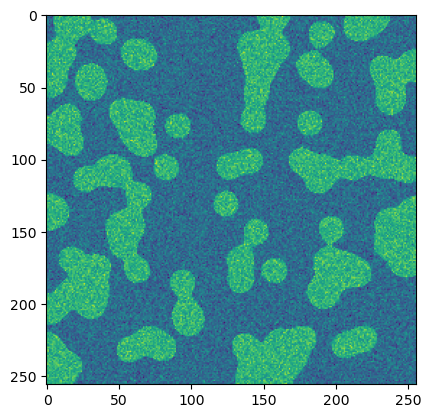

In [36]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256

im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = (im > im.mean()).astype(float)
img = mask + 0.3*np.random.randn(*mask.shape)


plt.imshow(img)

## Fit a Gaussian Mixture Model

In [37]:
from sklearn.mixture import GaussianMixture

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

gmm = GaussianMixture(n_components=2)
gmm.fit(img.reshape((img.size, 1)))

threshold = np.mean(gmm.means_)
binary_img = img > threshold

In [38]:
gmm.means_

array([[-0.00771333],
       [ 0.98539928]])

In [39]:
gmm.covariances_

array([[[0.08629182]],

       [[0.09559051]]])

### Display the result

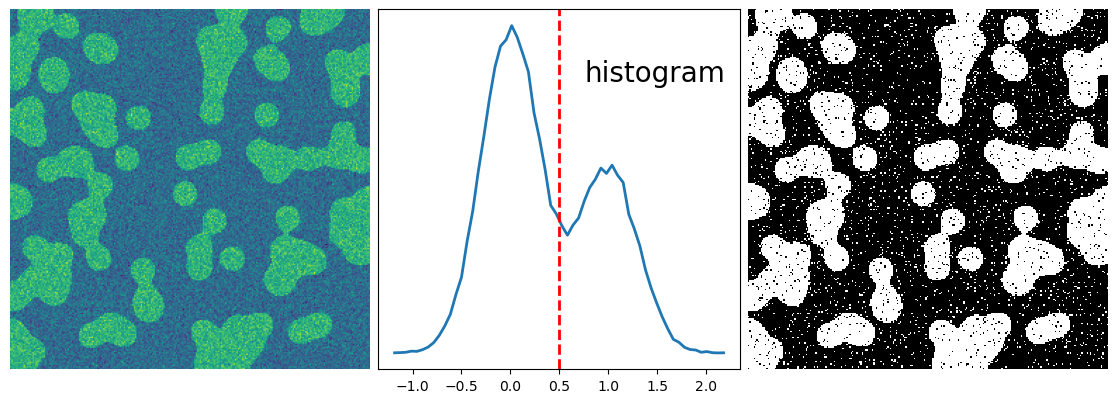

In [40]:

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

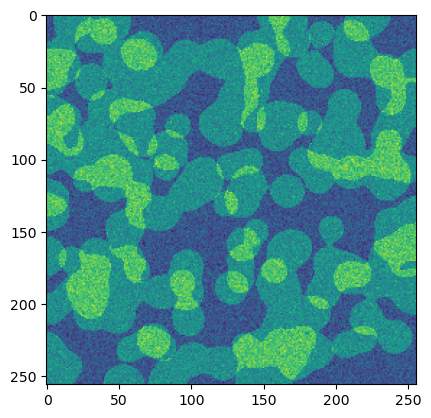

In [78]:
np.random.seed(1)
n = 10
l = 256
noise=0.21
im1 = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im1[(points[0]).astype(int), (points[1]).astype(int)] = 1
im1 = ndimage.gaussian_filter(im1, sigma=l/(4.*n))
mask1 = (im1 > im1.mean()).astype(float)
img1 = mask1 + noise*np.random.randn(*mask1.shape)

im2 = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im2[(points[0]).astype(int), (points[1]).astype(int)] = 2
im2 = ndimage.gaussian_filter(im2, sigma=l/(4.*n))
mask2 = (im2 > im.mean()).astype(float)
img2 = mask2 + noise*np.random.randn(*mask2.shape)
img=img1+img2

plt.imshow(img)

In [79]:
from sklearn.mixture import GaussianMixture

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

gmm = GaussianMixture(n_components=3)
gmm.fit(img.reshape((img.size, 1)))

threshold1 = np.mean(gmm.means_[0:2])
threshold2 = np.mean(gmm.means_[1:3])

print(threshold1)
print(threshold2)



0.5074125516935908
1.4844718886279968


In [80]:
binary_img = (img > threshold1)*2 + (img > threshold2)*1

In [81]:
gmm.means_[1:3]

array([[0.99912731],
       [1.96981647]])

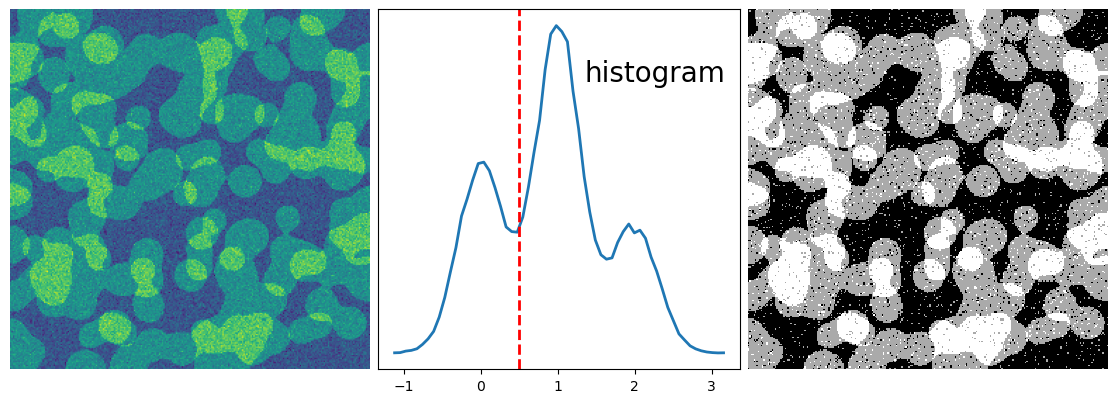

In [82]:

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()